Load the data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../data/simulated_campaign_data.csv")

df.head()

,age,income,tenure,usage,treatment,outcome
0,45.960570,49822.579043,0.171827,22.585829,1,0
1,38.340828,55417.508054,12.756704,71.510244,1,1
2,47.772262,51039.284084,4.828591,47.126945,1,0
3,58.276358,61656.270704,6.093305,48.104323,1,0
4,37.190160,77957.677972,3.555397,49.399838,1,0


In [10]:
df["treatment"].value_counts(normalize=True)

treatment
1    0.8291
0    0.1709
Name: proportion, dtype: float64

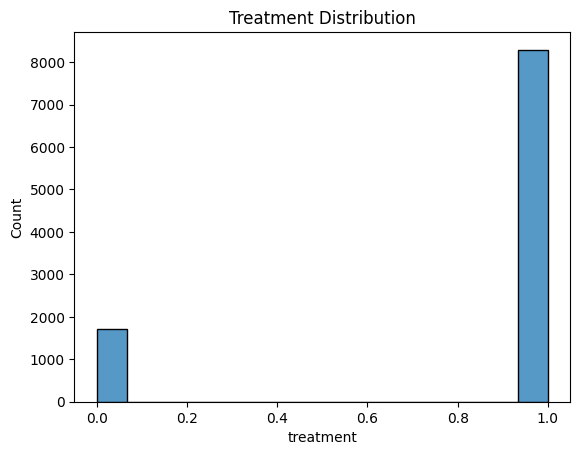

In [11]:
sns.histplot(df["treatment"])
plt.title("Treatment Distribution")
plt.show()

In [12]:
df.groupby("treatment")[["age","income","tenure","usage"]].mean()

,age,income,tenure,usage
treatment,,,,
0,36.886854,56979.009330,4.646442,49.491898
1,40.610789,60867.564952,2.590978,49.841771


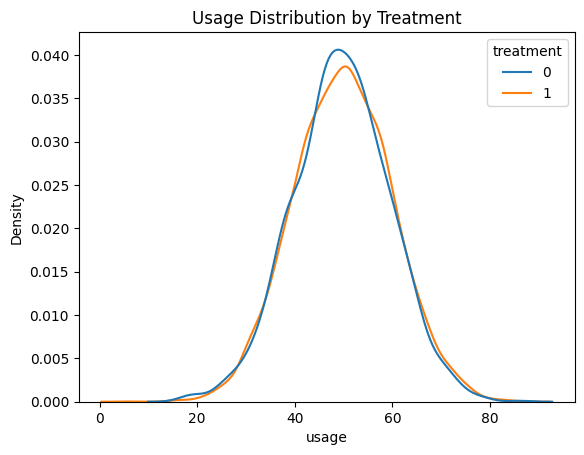

In [13]:
sns.kdeplot(data=df, x="usage", hue="treatment", common_norm=False)
plt.title("Usage Distribution by Treatment")
plt.show()

In [14]:
df.groupby("treatment")["outcome"].mean()

treatment
0    0.602692
1    0.284284
Name: outcome, dtype: float64

In [16]:
df_random = df.copy()
df_random["random_treatment"] = \
    np.random.binomial(1, 0.5, len(df))

df_random.groupby("random_treatment")["outcome"].mean()

random_treatment
0    0.332275
1    0.345231
Name: outcome, dtype: float64